## Graph theoretical measures in Network Neuroscience.

Connectomes in network neuroscience could be represented with different types of graphs. In turn, these graphs could be analyzed with graph theoretical measures and mathematical apparatus behind them. 

A good primer on graph theoretical measures could be found here:
http://braph.org/braph-1-0/manual/graph-measures/

Let's look at the minimal example of how graph representation could be usefull when thinking of basal ganglia system.

In [34]:
#imports
import matplotlib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt1
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
#adjacency matrix
A = np.array([[0,1,0,0,0,0,0,0,0,1,1,1], [1,0,1,1,1,0,0,0,0,1,0,0], [1,1,0,1,1,0,0,0,0,0,0,0], 
              [0,1,1,0,1,1,1,1,0,1,1,1], [0,-1,-1,-1,0,0,0,0,-1,0,-1,-1], [0,1,0,1,1,0,1,1,1,0,1,1], 
              [0,-1,0,-1,-1,-1,0,-1,-1,0,-1,-1], [0,0,0,0,-1,-1,-1,-1,-1,-1,-1,0], [0,0,0,0,-1,0,-1,-1,-1,0,-1,0],
              [0,1,0,1,0,1,0,1,1,1,1,0],[0,0,0,0,-1,1,-1,-1,-1,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0]]) #directed FOG network 
              #(LC,PRF,CNF,PPN,SNr,STN,GPi,GPe,Str,Ctx,SNc,Th)
PD=np.array([[0,1,0,0,0,0,0,0,0,1,1,1], [1,0,1,1,1,0,0,0,0,1,0,0], [1,1,0,1,1,0,0,0,0,0,0,0], 
              [0,1,1,0,1,1,1,1,0,1,1,1], [0,-1,-1,-1,0,0,0,0,-1,0,-1,-1], [0,1,0,1,1,0,1,1,1,0,1,1], 
              [0,-1,0,-1,-1,-1,0,-1,-1,0,-1,-1], [0,0,0,0,-1,-1,-1,-1,-1,-1,-1,0], [0,0,0,0,-1,0,-1,-1,-1,0,-1,0],
              [0,1,0,1,0,1,0,1,1,1,1,0],[0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0]]) 

In [11]:
#creating a graph
G = nx.from_numpy_array(A,create_using=nx.DiGraph)
G1 = nx.from_numpy_array(PD,create_using=nx.DiGraph)

#label graph
labeldict = {}
labeldict[0] = "LC"
labeldict[1] = "PRF"
labeldict[2] = "CNF"
labeldict[3] = "PPN"
labeldict[4] = "SNr"
labeldict[5] = "STN"
labeldict[6] = "GPi"
labeldict[7] = "GPe"
labeldict[8] = "Str"
labeldict[9] = "Ctx"
labeldict[10] = "SNc"
labeldict[11] = "Th"

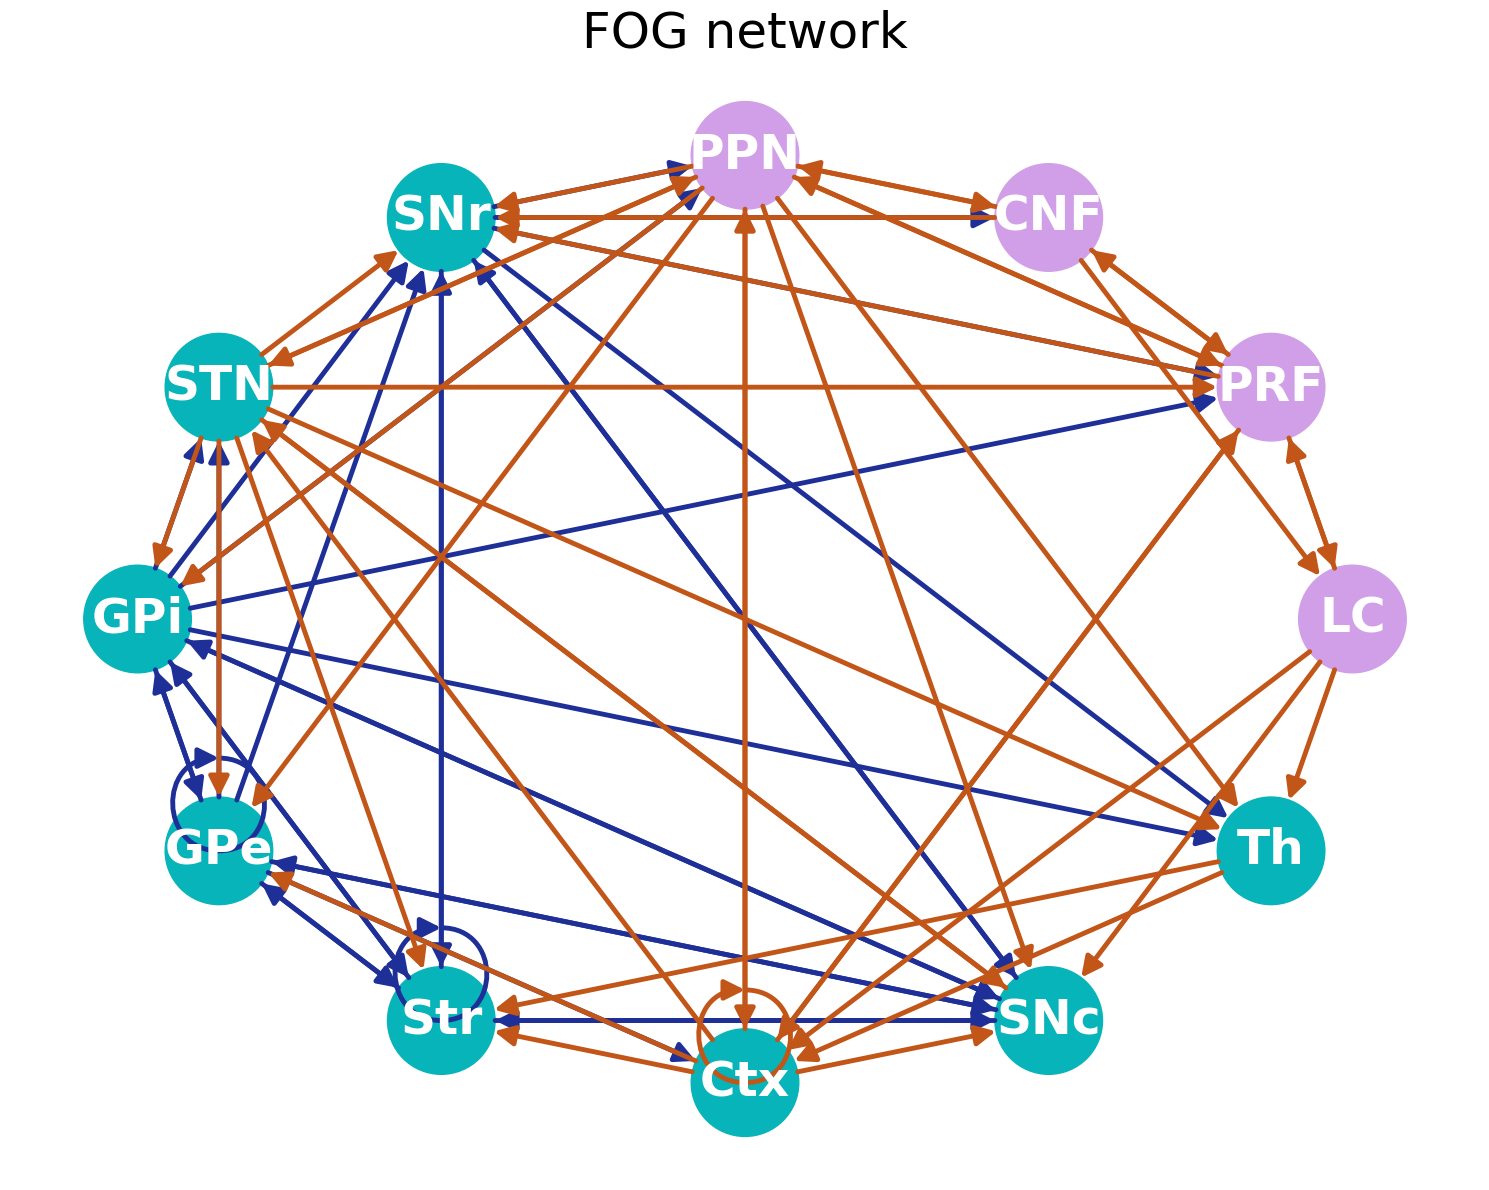

In [12]:
#plotting utility
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

mashas_dict = nx.get_edge_attributes(G, 'weight')

fig = plt.figure(figsize=(15,12)) 
color = ['#D19FE8','#D19FE8','#D19FE8','#D19FE8','#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff',
        '#07b4b9ff', '#07b4b9ff']
pos = nx.circular_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, alpha=1, node_color=color, node_size=6000)
edges = nx.draw_networkx_edges(G, pos,node_size=6000,edgelist = list(getKeysByValue(mashas_dict,-1)),edge_color='#1e2f97ff',width=3.5, arrowsize=30)
edges = nx.draw_networkx_edges(G, pos,node_size=6000,edgelist = list(getKeysByValue(mashas_dict,1)),edge_color='#c25518ff',width=3.5, arrowsize=30)
labels = nx.draw_networkx_labels(G, pos,labels=labeldict,font_size=35,font_color='w',font_weight='bold')
nodes.set_zorder(0) 
plt.title('FOG network',fontsize=36)
plt.box(False)
fig.tight_layout()
#plt.savefig(f'Animations/new_network_805.pdf', dpi=600,transparent=True)
plt.show()

In [13]:
#betweenness centrality
bc = nx.betweenness_centrality(G)
print('Betweenness centrality:', bc)

inverse_dict = [(value, key) for key, value in bc.items()]
max_bc = max(inverse_dict)[1]

print('Node with maximal bc:', max_bc) #PRF

# #eigenvector centrality
# ec = nx.eigenvector_centrality(G)
# #print('Eigenvector centrality:', ec)

# #sort from highest to lowest
# sort_ec = sorted(ec, key=ec.get, reverse=True)
# #print('Nodes with the highest 3 ecs:', sort_ec[:3]) #SNc, SNr, GPe


Betweenness centrality: {0: 0.014393939393939393, 1: 0.10954545454545453, 2: 0.01621212121212121, 3: 0.09954545454545456, 4: 0.1072077922077922, 5: 0.029935064935064933, 6: 0.04175324675324675, 7: 0.030389610389610387, 8: 0.03969696969696969, 9: 0.09175324675324674, 10: 0.04402597402597401, 11: 0.011904761904761904}
Node with maximal bc: 1


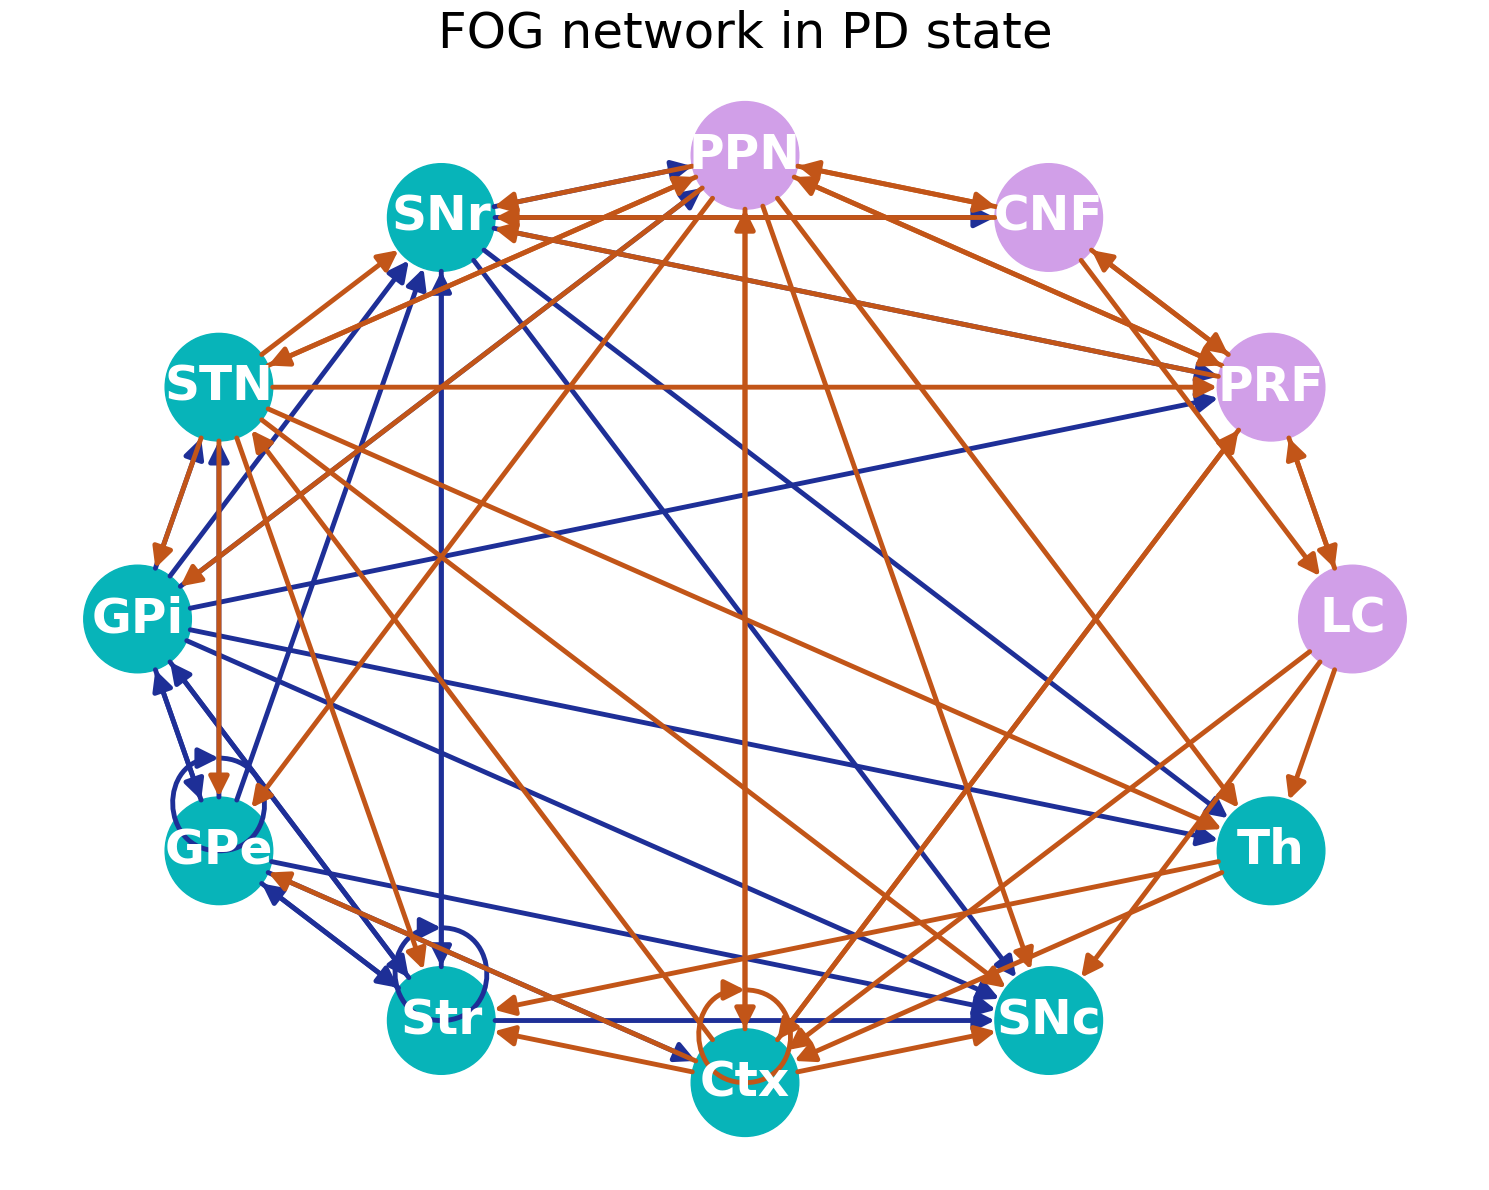

In [14]:
mashas_dict = nx.get_edge_attributes(G1, 'weight')

fig = plt.figure(figsize=(15,12)) 
color = ['#D19FE8','#D19FE8','#D19FE8','#D19FE8','#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff', '#07b4b9ff',
        '#07b4b9ff', '#07b4b9ff']
pos = nx.circular_layout(G1)
nodes = nx.draw_networkx_nodes(G1, pos, alpha=1, node_color=color, node_size=6000)
edges = nx.draw_networkx_edges(G1, pos,node_size=6000,edgelist = list(getKeysByValue(mashas_dict,-1)),edge_color='#1e2f97ff',width=3.5, arrowsize=30)
edges = nx.draw_networkx_edges(G1, pos,node_size=6000,edgelist = list(getKeysByValue(mashas_dict,1)),edge_color='#c25518ff',width=3.5, arrowsize=30)
labels = nx.draw_networkx_labels(G1, pos,labels=labeldict,font_size=35,font_color='w',font_weight='bold')
nodes.set_zorder(0) 
plt.title('FOG network in PD state',fontsize=36)
plt.box(False)
fig.tight_layout()
#plt.savefig(f'Animations/new_network_805.pdf', dpi=600,transparent=True)
plt.show()

In [15]:
bc1 = nx.betweenness_centrality(G1)
print('Betweenness centrality:', bc1)

inverse_dict = [(value, key) for key, value in bc1.items()]
max_bc = max(inverse_dict)[1]

print('Node with maximal bc1:', max_bc)

Betweenness centrality: {0: 0.014393939393939393, 1: 0.10909090909090907, 2: 0.013939393939393937, 3: 0.11090909090909092, 4: 0.08469696969696969, 5: 0.021060606060606057, 6: 0.03212121212121212, 7: 0.0253030303030303, 8: 0.04651515151515151, 9: 0.10863636363636363, 10: 0.0, 11: 0.01515151515151515}
Node with maximal bc1: 3


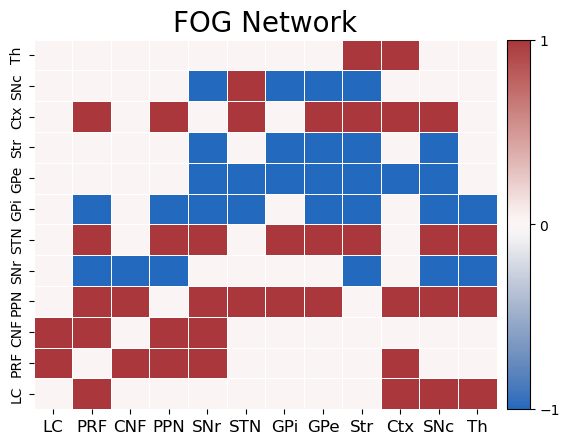

In [39]:
ax = sns.heatmap(A, linewidth=0.5, cmap="vlag", xticklabels=labeldict.values(), yticklabels=labeldict.values(), cbar=False)
ax.set_xticklabels(labeldict.values(), fontsize=12)
ax.set(ylim=ax.get_ylim()[::-1])
ax.set_title('FOG Network', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
cbar= plt.colorbar(ax.collections[0], cax=cax)
cbar.set_ticks([-1,0,1])
sns.color_palette("vlag", as_cmap=True)
plt1.show()